<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/EulerIdentity_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Euler's Identity in 3D</h1></b>

Dr. Bingsen Wang

11/26/2024
</center>

#Python Code


0
0
300
0


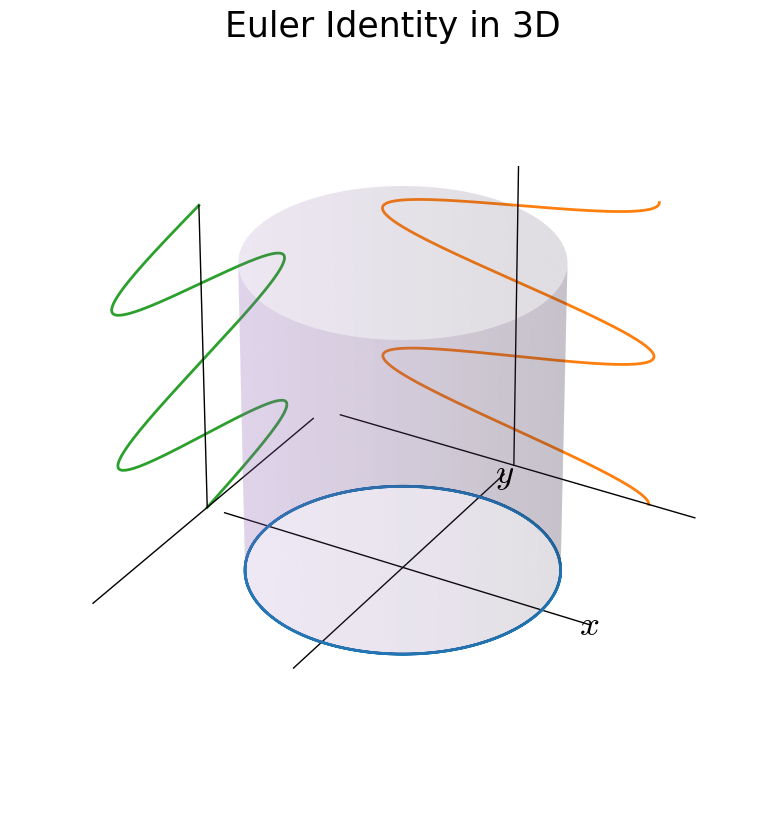

In [2]:
import numpy as np
from matplotlib import animation,pyplot,cm,colors
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def axclear(ax):
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()
  zlim=ax.get_zlim()
  ax.clear()
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_zlim(zlim)
  ax.axis('off')
  return

Nz = 300
r0,rmax,zmin,zmax = 1.5,2,0,4*np.pi
theta0 = np.linspace(0,2*np.pi,100)
z = np.linspace(zmin,zmax,Nz)
x,y = r0*np.cos(z),r0*np.sin(z)
clst = list(cm.tab10.colors)#colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes((.075,.05,.85,.85),xlim=[-rmax*1.1,rmax*1.1],ylim=[-rmax*1.1,rmax*1.1],zlim=[zmin,zmax],
                   projection='3d',facecolor='none')
ax1 = fig.add_axes((.075,.05,.85,.85),xlim=[-rmax*1.1,rmax*1.1],ylim=[-rmax*1.1,rmax*1.1],zlim=[zmin,zmax],
                   projection='3d',facecolor='none')
ax1.axis('off')
ax.axis('off')

ax.set_title('Euler Identity in 3D',size=25)
for k in range(2):
  ax.text3D([rmax,0][k],[0,rmax][k],0,['$x$','$y$'][k],ha='center',va='center',size=25,c='k')
  ax.plot([[-rmax,rmax],[0,0]][k],[[0,0],[-rmax,rmax]][k],[0,0],c='k',lw=1)

lines=[ax.plot([],[],[],'-',color=clst[i],lw=2+i//3*2)[0] for i in range(4)]
def animate(ii):
  i,k=ii%Nz,ii//Nz
  if i==0: print(ii) #for monitoring
  if k==0:
    lines[3].set_data_3d(x[:i+1],y[:i+1],z[:i+1])
    zsurf = np.linspace(0, z[i], Nz)
    theta_grid, z_grid=np.meshgrid(theta0, zsurf)
    x_grid = r0 * np.cos(theta_grid)
    y_grid = r0 * np.sin(theta_grid)
    axclear(ax1)
    ax1.plot_surface(x_grid, y_grid, z_grid,color=clst[4], alpha=0.15)
  else:
    if i==0:
      ax.plot([-rmax,rmax],[rmax*1.1,rmax*1.1],[0,0],c='k',lw=1)
      ax.plot([-rmax*1.1,-rmax*1.1],[-rmax,rmax],[0,0],c='k',lw=1)
      ax.plot([0,0],[rmax*1.1,rmax*1.1],[zmin,zmax],c='k',lw=1)
      ax.plot([-rmax*1.1,-rmax*1.1],[0,0],[zmin,zmax],c='k',lw=1)
      zsurf = np.linspace(0, zmax, Nz)
      theta_grid, z_grid=np.meshgrid(theta0, zsurf)
      x_grid = r0 * np.cos(theta_grid)
      y_grid = r0 * np.sin(theta_grid)
      ax.plot_surface(x_grid, y_grid, z_grid,color=clst[4], alpha=0.15)
    lines[0].set_data_3d(x[:i+1],y[:i+1],0*z[:i+1])
    lines[1].set_data_3d(x[:i+1],0*y[:i+1]+rmax*1.1,z[:i+1])
    lines[2].set_data_3d(x[:i+1]*0-rmax*1.1,y[:i+1],z[:i+1])
    axclear(ax1)
    ax1.scatter3D([x[i],x[i],x[i],-rmax*1.1], [y[i],y[i],rmax*1.1,y[i]],[z[i],0,z[i],z[i]],
                  s=60,fc='k',marker='o')
    ax1.plot([x[i],x[i]],[y[i],y[i]],[zmin,z[i]],'--',color=clst[0],lw=1)
    ax1.plot([x[i],x[i]],[rmax*1.1,y[i]],[z[i],z[i]],'--',color=clst[1],lw=1)
    ax1.plot([-rmax*1.1,x[i]],[y[i],y[i]],[z[i],z[i]],'--',color=clst[2],lw=1)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nz*2, interval=40)
anim.save("EulerIdentity_3d.mp4", writer=animation.FFMpegWriter(fps=40), dpi = 200)